В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [21]:
medical_df = pd.read_csv('medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [22]:
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [23]:
# Додаємо колонку одиничок аби задачи bias терм (константу в моделі регресії)
X_with_intercept = np.c_[np.ones((non_smoker_df.age.shape[0], 1)), non_smoker_df.age]
non_smoker_df.age[:3], X_with_intercept[:3]

(1    18
 2    28
 3    33
 Name: age, dtype: int64,
 array([[ 1., 18.],
        [ 1., 28.],
        [ 1., 33.]]))

In [24]:
#цільова змінна у
y = non_smoker_df['charges']

In [25]:
MNK_coefs = normal_equations(X_with_intercept, y)
MNK_coefs

array([-2091.42055657,   267.24891283])

In [26]:
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)

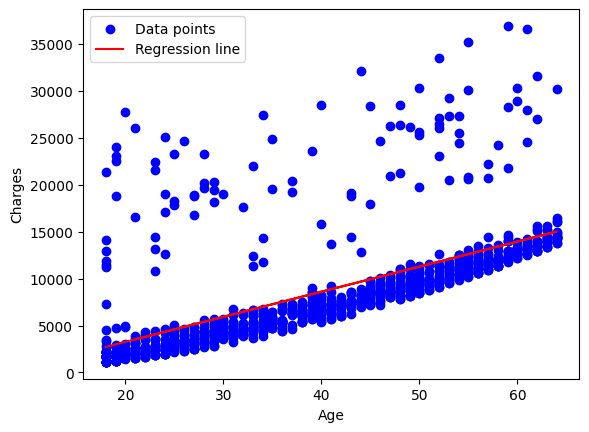

In [27]:
plt.scatter(non_smoker_df.age, y, color='blue', label='Data points')
plt.plot(non_smoker_df.age, predictions_MNK, color='red', label='Regression line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

In [28]:
rmse_MNK = mean_squared_error(y, predictions_MNK)
rmse_MNK

21738960.02391763

In [38]:
# Градієнтний спуск
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)

        m = m - lr * m_gradient
        b = b - lr * b_gradient

    return m, b, errors

In [80]:
X = non_smoker_df.age.values.reshape(-1, 1)

In [70]:
m, b, errors_1 = full_batch_gradient_descent(X, y, lr=0.0001, epochs=1000)
predictions_fbgd_1 = m * X[:, 0] + b

m, b

(221.1045843794301, -41.98126853149978)

In [71]:
rmse_FBGD_1 = mean_squared_error(y, predictions_fbgd_1)
rmse_FBGD_1

22214731.05641085

In [72]:
m, b, errors_2 = full_batch_gradient_descent(X, y, lr=0.000001, epochs=1000)
predictions_fbgd_2 = m * X[:, 0] + b

m, b

(213.4575690658104, 4.33124916239435)

In [73]:
rmse_FBGD_2 = mean_squared_error(y, predictions_fbgd_2)
rmse_FBGD_2

22312847.796586115

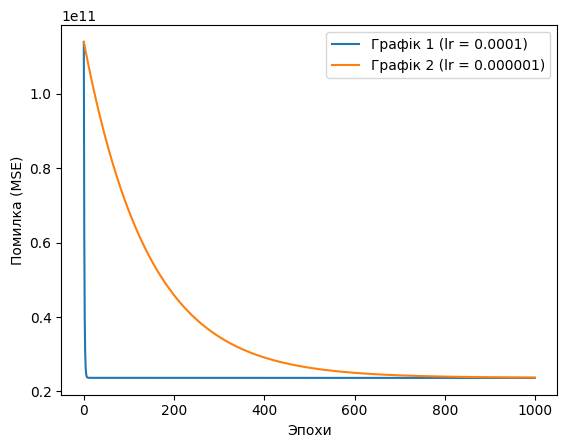

In [62]:
plt.plot(errors_1, label="Графік 1 (lr = 0.0001)")
plt.plot(errors_2, label="Графік 2 (lr = 0.000001)")
plt.xlabel('Эпохи')
plt.ylabel('Помилка (MSE)')
plt.legend()
plt.show()

In [102]:
X = non_smoker_df['age'].to_frame()
lin_reg = LinearRegression()
lin_reg.fit(X, y)
predictions_sklearn = lin_reg.predict(X)

In [103]:
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), -2091.4205565650864)

In [104]:
rmse_sklearn = mean_squared_error(y, predictions_sklearn)
rmse_sklearn

21738960.023917634

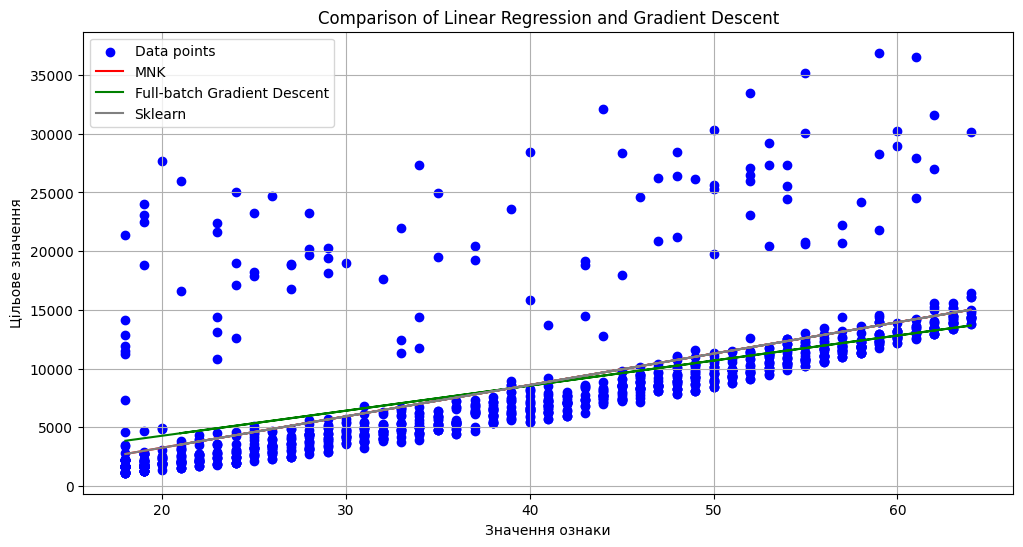

In [96]:
# Візуалізація результатів
X = non_smoker_df['age']
plt.figure(figsize=(12, 6))
plt.scatter(X.values, y, color='blue', label='Data points')
plt.plot(X.values, predictions_MNK, color='red', label='MNK')
plt.plot(X.values, predictions_fbgd_2, color='green', label='Full-batch Gradient Descent')
plt.plot(X.values, predictions_sklearn, color='grey', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()


**Висновки**
Графіки моделей MNK та Sklearn співпадають, також в цих моделях rmse трохи нижчій ніж у Full-batch Gradient Descent. Тож виходить, що MNK та Sklearn кращі за Full-batch Gradient Descen. Хоча все одно у всіх моделей дуже велика похибка, тож не можемо робити якихось надйних передбачень на цих даних моделлю лінійної регресії.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [97]:
smoker_df = medical_df[medical_df.smoker == 'yes']
X_smoker = smoker_df['age'].to_frame()
y_smoker = smoker_df['charges']

In [99]:
lin_reg_smoker = LinearRegression()
lin_reg_smoker.fit(X_smoker, y_smoker)
predictions_sklearn_smoker = lin_reg_smoker.predict(X_smoker)

In [105]:
lin_reg_smoker.coef_, lin_reg_smoker.intercept_

(array([305.23760211]), 20294.128126915966)

In [106]:
rmse_sklearn_smoker = mean_squared_error(y_smoker, predictions_sklearn_smoker)
rmse_sklearn_smoker

114725592.72306103

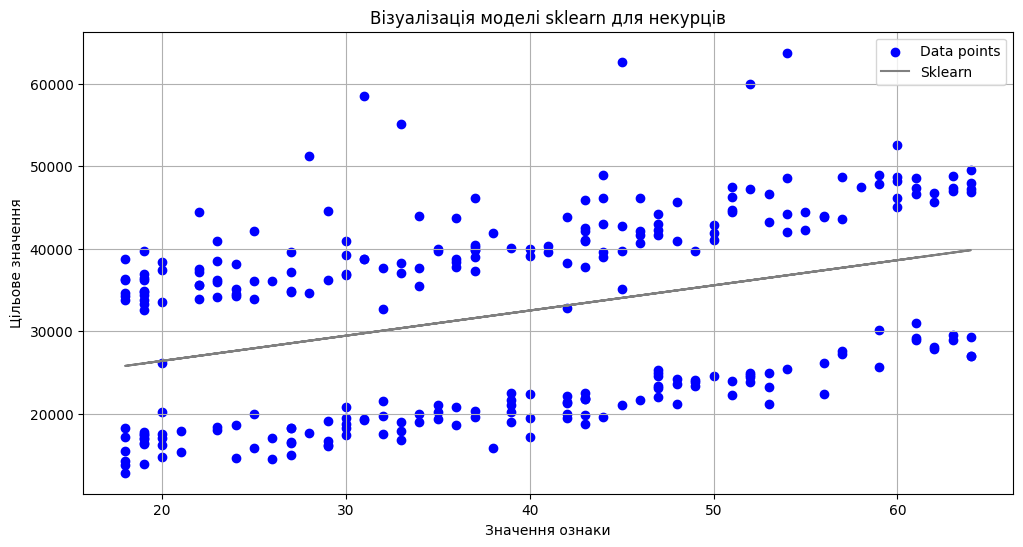

In [109]:
# Візуалізація результатів
X = smoker_df['age']
plt.figure(figsize=(12, 6))
plt.scatter(X.values, y_smoker, color='blue', label='Data points')
plt.plot(X.values, predictions_sklearn_smoker, color='grey', label='Sklearn')
plt.title('Візуалізація моделі sklearn для некурців')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

**Висновки**
Значення RMSE дуже велике, а також широкий розкид точок навколо лінії регресії свідчить про те, що модель не може добре передбачати витрати, використовуючи лише вік.